<a href="https://colab.research.google.com/github/Pepebeats-flp/Titanic-Exercise/blob/main/AnalisisTitanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Titanic - Machine Learning from Disaster
link = https://www.kaggle.com/c/titanic

José Pinto - 2023

## Datos

Se importan las librerías necesarias para el análisis de datos y se cargan los datos de entrenamiento y testeo.

In [296]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

In [297]:
# Cargamos los datos
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [298]:
# Imprimimos los primeros 5 registros
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [299]:
# Imprimimos los primeros 5 registros
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Limpiamos los datos de entrenamiento y testeo, eliminando las columnas que no aportan información relevante para el análisis.

In [300]:
# Imprimimos los tipos de datos de cada columna
train.info()

# Imprimimos los tipos de datos de cada columna
test.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

In [301]:
# Eliminamos las columnas que no vamos a utilizar (Name y Ticket)
train.drop(['Name','Ticket'],axis=1,inplace=True)
test.drop(['Name','Ticket'],axis=1,inplace=True)

In [302]:
# Cambiamos el Sex object por valores numericos [1,0]
train.Sex = train.Sex.astype('category').cat.codes 
test.Sex = test.Sex.astype('category').cat.codes

# Cambiamos el Embarked object por valores numericos
train.Embarked = train.Embarked.astype('category').cat.codes
test.Embarked = test.Embarked.astype('category').cat.codes

# Cambiamos el Cabin object por valores numericos
train.Cabin = train.Cabin.astype('category').cat.codes
test.Cabin = test.Cabin.astype('category').cat.codes

In [303]:
# Eliminamos los registros que no tienen valor
train.dropna(inplace=True)

# Imprimimos los tipos de datos de cada columna
train.info()
train.head()

<class 'pandas.core.frame.DataFrame'>
Index: 714 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  714 non-null    int64  
 1   Survived     714 non-null    int64  
 2   Pclass       714 non-null    int64  
 3   Sex          714 non-null    int8   
 4   Age          714 non-null    float64
 5   SibSp        714 non-null    int64  
 6   Parch        714 non-null    int64  
 7   Fare         714 non-null    float64
 8   Cabin        714 non-null    int16  
 9   Embarked     714 non-null    int8   
dtypes: float64(2), int16(1), int64(5), int8(2)
memory usage: 47.4 KB


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,1,22.0,1,0,7.2500,-1,2
1,2,1,1,0,38.0,1,0,71.2833,81,0
2,3,1,3,0,26.0,0,0,7.9250,-1,2
3,4,1,1,0,35.0,1,0,53.1000,55,2
4,5,0,3,1,35.0,0,0,8.0500,-1,2


## Análisis de datos

In [304]:
# Creamos una capa de entrada con 1 neurona (Age)
#capa = tf.keras.layers.Dense(units=1, input_shape=[1])


# Creamos capas intermedias
capa1 = tf.keras.layers.Dense(units=3, input_shape=[1])
capa2 = tf.keras.layers.Dense(units=3)

salida = tf.keras.layers.Dense(units=1)

modelo = tf.keras.Sequential([capa1, capa2, salida])

# Compilamos el modelo con la funcion de perdida y el optimizador
modelo.compile(
    optimizer=tf.keras.optimizers.Adam(0.1),
    loss='mean_squared_error'
)

# Entrenamos el modelo
print("Comenzamos entrenamiento")
historial = modelo.fit(train['Age'], train['Survived'], epochs=1000, verbose=False)
print("Modelo entrenado")

Comenzamos entrenamiento
Modelo entrenado


1/1 [==============================] - 0s 30ms/step
[[0.43221438]]


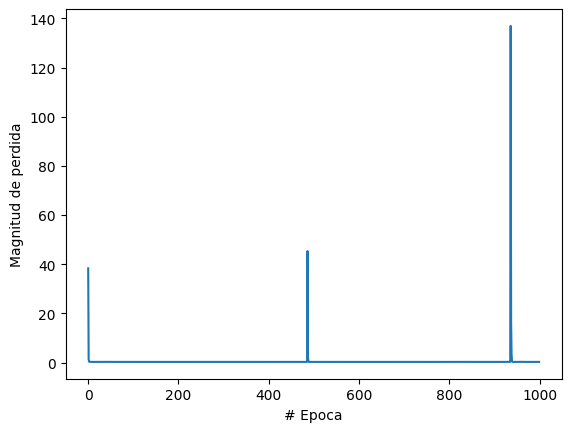

In [305]:
# Imprimimos el historial de perdidas
plt.xlabel("# Epoca")
plt.ylabel("Magnitud de perdida")
plt.plot(historial.history["loss"])

# Imprimimos el modelo
print(modelo.predict([20]))

In [306]:
# Realizamos la prediccion
test['Survived'] = modelo.predict(test['Age'])
test['Survived'] = test['Survived'].apply(lambda x: 1 if x > 0.5 else 0)
test.head()

# Guardamos el archivo
test.to_csv("submission.csv", columns=['PassengerId','Survived'], index=False)

14/14 [==============================] - 0s 410us/step
